#  Multiple Linear Regression & Polynomial Regression
<strong>multiple linear regression</strong>= mirip seperti regresi linier, tetapi dengan lebih dari satu nilai independen, artinya prediksi nilai berdasarkan dua atau lebih variabel.<br>
<strong>Polynomial Regression</strong> = Jika titik data Anda jelas tidak cocok dengan regresi linier (garis lurus melalui semua titik data), ini mungkin ideal untuk regresi polinomial. Regresi polinomial, seperti regresi linier, menggunakan hubungan antara variabel x dan y untuk menemukan cara terbaik untuk menggambar garis melalui titik data.

### Sample Dataset

#### Training Dataset
karena nilai dari kategori berupa nilai continue dan bukan kategori maka digunakan regression

In [95]:
import pandas as pd

pizza = {
    'diameter': [6, 8, 10, 14, 18],
    'n_topping': [2, 1, 0, 2, 0],
    'harga': [7, 9, 13, 17.5, 18]
}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [96]:
pizza = {
    'diameter': [8, 9, 11, 16, 12],
    'n_topping': [2, 0, 2, 2, 0],
    'harga': [11, 8.5, 15, 18, 11]
}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


### Menyiapakan Features dan Target

In [97]:
# data untuk training
import numpy as np
x_train = np.array(train_pizza_df[['diameter', 'n_topping']]) # feature
y_train = np.array(train_pizza_df['harga']) # target

print(f"x_train: \n{x_train}\n")
print(f"y_train: {y_train}\n")

x_train: 
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]



In [98]:
# data untuk testing
x_test = np.array(test_pizza_df[['diameter', 'n_topping']]) # feature
y_test = np.array(test_pizza_df['harga']) # target

print(f"x_test: \n{x_test}\n")
print(f"y_test: {y_test}\n")

x_test: 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]



### Multiple Linear Regression
merupakan generalisasi dari simple linear regression yang memukinkan untuk menggunakan beberapa expalanatory variabel.
<img src="multiple_linear.png">

In [99]:
# membuat model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [100]:
# evaluasi efektiitas model
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2_squared = r2_score(y_test, y_pred)

# pengukuran performa
print(f"r2_squared: {r2_squared}")

r2_squared: 0.7701677731318468


### Polynomial Regression
merupakan permodelan hubungan antara independent variabel x dan dependent variabel y sebagai derajat polynomial dalam x.<br><br>
independet = features<br>
dependent = target

#### Preprocessing Dataset

In [101]:
# data di pangkas untuk pemahaman
x_train = np.array(train_pizza_df[['diameter']])
y_test = np.array(train_pizza_df['harga'])

print(f"x_train: \n{x_train}\n")
print(f"y_train: {y_train}\n")

x_train: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]



### Polynomial Regression: Quadratic
<img src="quadratic.png">

In [102]:
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2) # degree 2 karena yang digunakan quadratic
x_train_quadratic = quadratic_feature.fit_transform(x_train)

print(f"x_train_quadratic: \n{x_train_quadratic}")

x_train_quadratic: 
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


In [103]:
# membuat dan mentrain model
model = LinearRegression() 
model.fit(x_train_quadratic, y_train)

LinearRegression()

### Visualisasi Model

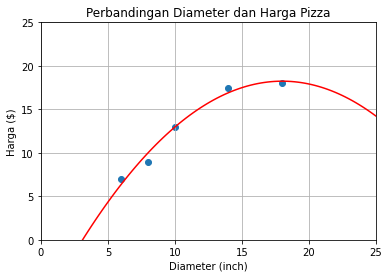

In [104]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0, 25, 100).reshape(-1, 1) # feature yang akan di prediksi
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis_quadratic, 'r')

plt.title("Perbandingan Diameter dan Harga Pizza")
plt.xlabel("Diameter (inch)")
plt.ylabel("Harga ($)")

plt.xlim(0, 25)
plt.ylim(0, 25)

plt.grid(True)

plt.show()

### Polynomial Regression: Quadratic vs Cubic

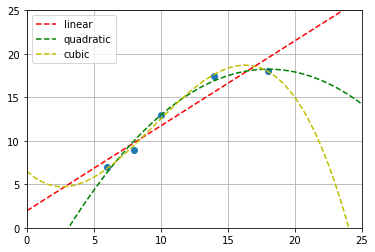

In [107]:
# training set
plt.scatter(x_train, y_train)

# linear
model = LinearRegression()
model.fit(x_train, y_train)

x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label='linear')


# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis_quadratic, '--g', label='quadratic')


# Cubic
cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_cubic, y_train)

x_vis_cubic = cubic_feature.transform(x_vis)
y_vis_cubic = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis_cubic, '--y', label='cubic')


# settingan grafik
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()